In [1]:
# Supervised Learning Models

In [2]:
from sklearn import datasets
import numpy as np

In [3]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [4]:
np.unique(y)

array([0, 1, 2])

In [5]:
##Split data into train/test sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=0)

C:\Users\param\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
## Standardizing training/test data with sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [7]:
## train Perceptron model
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

C:\Users\param\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [8]:
## make predictions from model
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
# print('Accuracy: ' + str(1-((y_test != y_pred).sum())/float(len(y_test))))

Misclassified samples: 4


In [9]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f'% accuracy_score(y_test, y_pred))

Accuracy: 0.91


In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

def plot_decision_regions(X, y, classifier, 
                    test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]                               
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
        
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]   
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', 
                alpha=1.0, linewidth=1, marker='o', 
                s=55, label='test set')

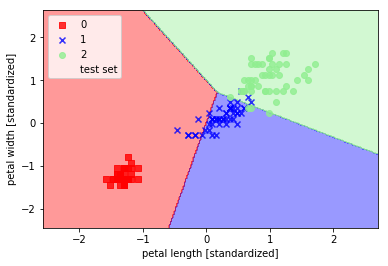

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, 
                      classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]') 
plt.ylabel('petal width [standardized]') 
plt.legend(loc='upper left')
plt.show()

# Logistic regression intuition and conditional probabilities

logit(p) = log( 1/(1-p) )

Logistic function (sigmoid) = phi(z) = 1 / (1+ e^-z)

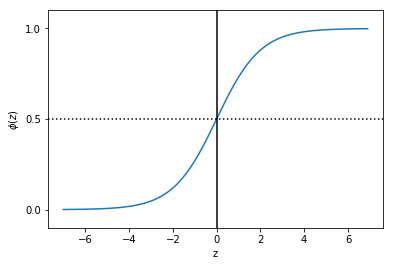

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

## Training a logistic regression model with scikit-learn

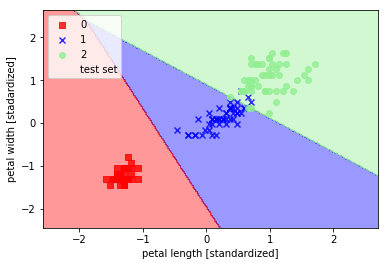

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [stadardized]')
plt.legend(loc='upper left')
plt.show()


In [15]:
lr.predict_proba(X_test_std)[0,]

array([2.05743774e-11, 6.31620264e-02, 9.36837974e-01])

#### Cost Function with inverse regularization, (C = 1/lambda)

Decreasing the value of the inverse regularization parameter, C, means that we are increasing the regularization stength. Which makes sense, C gets bigger with smaller values of lambda, so increasing lambda would decrease regularization strength.


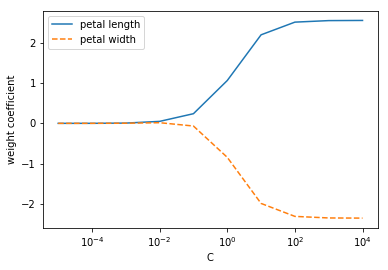

In [16]:
## fitting 10 logistic reg models with different values of 
## inverse-regularization parameter C.

weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10**float(c), random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**float(c))
weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

## NOTEs:
                       
As we can see in the resulting plot, the weight coefficients shrink if we decrease the parameter C, that is, if we increase the regularization strength:

# SVM Training :)

In [17]:
from IPython.display import Image
from IPython.core.display import HTML 

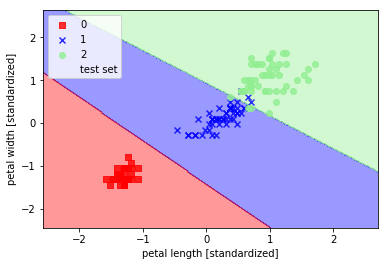

In [18]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### Logistic Regression versus SVM

 - Often yield similar results
 - Logistic regression is trying to maximize conditional likelihoods which makes it more prone to outliers.
 - SVMs care mostly about points closest to the decision boundary (the support vectors)
 - Logistic regression is the simpiler methose and implemented more easily. 
 - Logistic regression can also be easily updated which is attractive when working with streaming data.
   

In [19]:
## SGDClassifier, usful for online learning via partial fit method
## SGDClassifier similar to stochastic gradient descent
## examples perceptron, logistic reg., svm
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

### Solving nonlinear problems using a kernal SVM

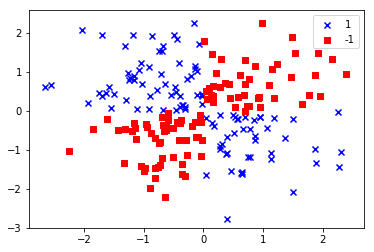

In [20]:
np.random.seed(0)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:,1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1],
           c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1],
           c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

Notice the points are not easily seperable via a linear hyperplane as the decision boundary (i.e. linear logistic regression or linear SVM)

Use kernals, to make linearly insepereable data easier to seperate. Idea behind kernals: create nonlinear combinations of original features and project them onto a higher dimension via a mapping function phi(dot), where it becomes linearly seperable

In [21]:
from IPython.display import Image
from IPython.core.display import HTML 

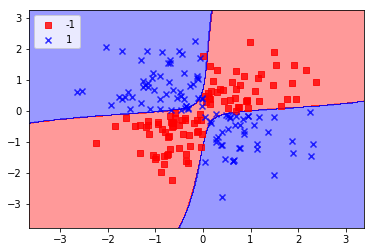

In [22]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

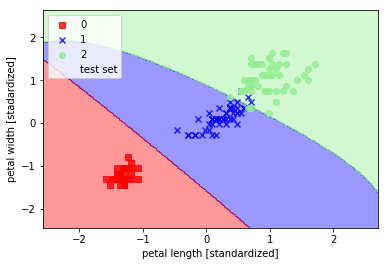

In [23]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [stadardized]')
plt.legend(loc='upper left')
plt.show()

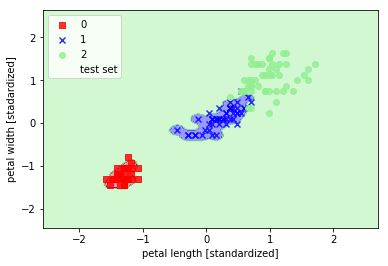

In [24]:
## increasing gamma
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm,
                     test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [stadardized]')
plt.legend(loc='upper left')
plt.show()

## NOTEs
notice increasing gamma (to 100) creates a ridiculously overfit model. Kernals best for nonlinear data, iris set is seperated descently with linear hyperplanes

## Decision tree learning

#### Information gained methods
 - Gini Impurity (good)
 - Entropy (good)
 - Classification Error (don't grow tree with this)

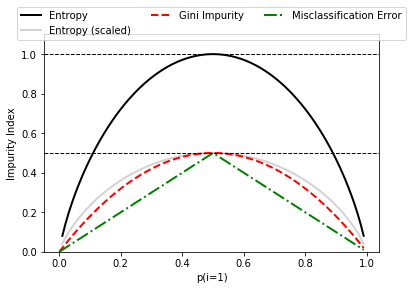

In [25]:
import matplotlib.pyplot as plt
import numpy as np
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini Impurity', 
                           'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray',
                           'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, 
                   linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

## NOTE
Note that we will also add in a scaled version of the entropy (entropy/2) to observe that the Gini impurity is an intermediate measure between entropy and the classification error. 

###### Building a decision tree

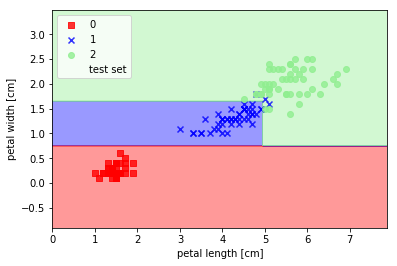

In [26]:
## using entropy as a criterion for impurity
## max depth of 3
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3,
                             random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree,
                     test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

In [27]:
#graphviz.org
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot',
               feature_names=['petal length',
                             'petal width'])

###### Random forrest

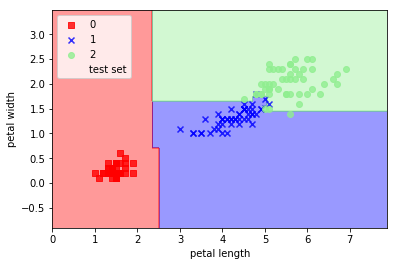

In [28]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy',
                               n_estimators=10,
                               random_state=1,
                               n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined,
                     classifier=forest,
                     test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

## NOTE
Using the preceding code, we trained a random forest from 10 decision trees via the n_estimators parameter and used the entropy criterion as an impurity measure to split the nodes. Although we are growing a very small random forest from a very small training dataset, we used the n_jobs parameter for demonstration purposes, which allows us to parallelize the model training using multiple cores of our computer (here, two).

###### KNN

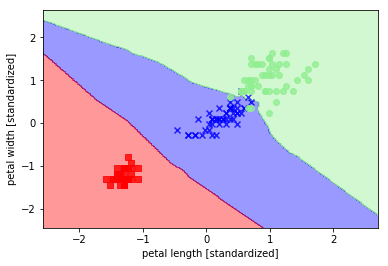

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.show()